# Decision Tree: Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [12]:
## Imports:

# Standard DS imports
import numpy as np
import pandas as pd

# acquisition:
from pydataset import data
import acquire

# prep
import prepare

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from scipy import stats

# read_csv
import os

# Modeling
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree, export_text

In [58]:
# aquire data
df = acquire.get_titanic_data('titanic_db')

In [59]:
# prep data
df = prepare.prep_titanic(df)

In [60]:
df = df.drop(columns=['sex','embark_town'])

In [61]:
# split data
train_titanic, validate_titanic, test_titanic = prepare.split_function(df, 'survived')
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

# x and y for Training Set
x_train = train_titanic.drop(columns=['survived'])
y_train = train_titanic[['survived']]

# x and y for Validate Set
x_validate = validate_titanic.drop(columns=['survived'])
y_validate = validate_titanic[['survived']]

# x and y for Test Set
x_test = test_titanic.drop(columns=['survived'])
y_test = test_titanic[['survived']]

Prepared df: (891, 10)

Train: (534, 10)
Validate: (178, 10)
Test: (179, 10)


### 1.. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



#### 1.1. What is your baseline prediction?

In [62]:
# The most common value is the encoded value '0', or "Did not survive"
df.survived.value_counts()
df['baseline_prediction'] = 0

#### 1.2. What is your baseline accuracy?

In [63]:
baseline_accuracy = (df.survived == df.baseline_prediction).mean()
print(f'Baseline accuracy is{baseline_accuracy: .2%}')

Baseline accuracy is 61.62%


### 2.. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [64]:
# 1. Create Object:
clf = DT(max_depth=2, random_state=123)

In [65]:
# 2. Fit Model
# define x and Y:

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=123)

[Text(0.5, 0.8333333333333334, 'sex_male <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.372\nsamples = 186\nvalue = [46, 140]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.078\nsamples = 98\nvalue = [4, 94]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 88\nvalue = [42, 46]'),
 Text(0.75, 0.5, 'fare <= 18.275\ngini = 0.304\nsamples = 348\nvalue = [283, 65]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.193\nsamples = 222\nvalue = [198, 24]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.439\nsamples = 126\nvalue = [85, 41]')]

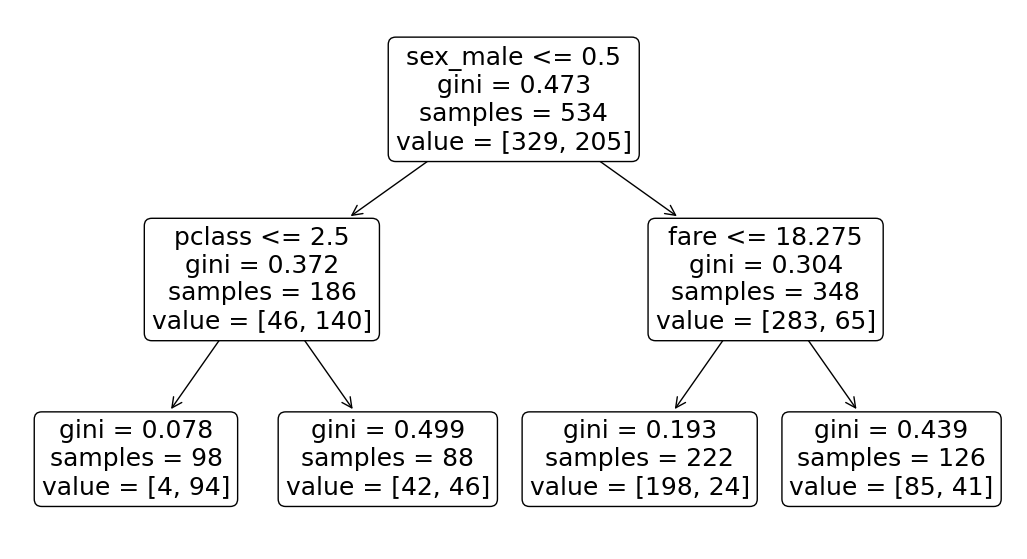

In [68]:
# Viz
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=x_train.columns, rounded=True)

In [69]:
# Make predictions:
model_preds = clf.predict(x_train)

### 3.. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [70]:
# Accuracy Score
accuracy_score(y_train, model_preds)

0.7921348314606742

In [71]:
# Confusion Matrix
confusion_matrix(y_train, model_preds)

array([[283,  46],
       [ 65, 140]])

In [73]:
pd.DataFrame(
    confusion_matrix(y_train, model_preds),
    columns=['pred_0', 'pred_1'],
    index=['actual_0', 'actual_1'])

,pred_0,pred_1
actual_0,283,46
actual_1,65,140


In [76]:
pd.DataFrame(
    classification_report(y_train, 
                      model_preds,
                     output_dict=True)).T

,precision,recall,f1-score,support
0,0.813218,0.860182,0.836041,329.000000
1,0.752688,0.682927,0.716113,205.000000
accuracy,0.792135,0.792135,0.792135,0.792135
macro avg,0.782953,0.771555,0.776077,534.000000
weighted avg,0.789981,0.792135,0.790001,534.000000


### 4.. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
**ANSWER: Accuracy: 79.21%; 

0.28629856850715746

### 5.. Run through steps 2-4 using a different max_depth value.

### 6.. Which model performs better on your in-sample data?